# Basic Tutorial to RFI-Matcher

## Imports

Ensure you have pip-installed the **rfi_matcher** package by running `pip install .` in the root of the folder.

In [1]:
# Some code in rfi_matcher uses asyncio.run() functions
# Jupyter does not like this unless the code below is run:
import nest_asyncio
nest_asyncio.apply()
# =================

import matplotlib.pyplot as plt

from rfi_matcher.model.rfi_filter import RaFilter
from rfi_matcher.rfi_matcher import RfiMatcher
from rfi_matcher.utils import sopp_utils, time_utils, skyfield_utils

## Observatory Filter

In [2]:
ra_filter = (
    RaFilter()
        .set_observatories(['MEERKAT'])
        # .set_frequencies([500, 1100])
        # .set_observatories(['VERY LARGE ARRAY NM', 'PARKES NSW', 'MEERKAT'])
        # .set_latitude([-40, 40])
        # .set_longitude([100, 110])
        # .set_frequencies([241000, 275000])
        .set_start_time("2024-06-01T08:49:54.0")
        .set_end_time("2024-07-01T10:32:48.0")
)

observatories = ra_filter.get_observatories()
print(observatories)

['MEERKAT']


## RFI Matcher

In [3]:
matcher = RfiMatcher(ra_filter)

### Fetch TLEs

In [4]:
satellites_filepath = 'data/satellites.tle'
matcher.fetch_tles(satellites_filepath)

2024-06-01
2024-07-01


### Get Observations

In [5]:
observations = matcher.get_all_observations(observatories)

[login] 20:51:15 🔄 Attempting to refresh token...


Fetching from MEERKAT
filters: ['Band=HF,VHF,ULF,L,S,C,X,Ku,K,Ka,Q,V,W', 'from=2024-06-01', 'to=2024-07-01']


[login] 20:51:16 ✅ Token refreshed successfully.


Error: 'SwiftJ1727'
Error: 'SwiftJ1727'


In [6]:
nb_obs, cols = observations.shape
print("Rows:", nb_obs, "Cols:", cols)
print(observations.columns)

print(observations.head(10))

Rows: 614 Cols: 9
Index(['name', 'observation_id', 'frequency', 'bandwidth', 'declination',
       'right_ascension', 'begin', 'end', 'url'],
      dtype='object')
      name     observation_id    frequency    bandwidth     declination  \
0  MEERKAT  1719861927-sdp-l0  816000000.0  544000000.0  -17d31m45.401s   
1  MEERKAT  1719861927-sdp-l0  816000000.0  544000000.0  -17d31m45.401s   
2  MEERKAT  1719861927-sdp-l0  816000000.0  544000000.0   -0d58m46.600s   
3  MEERKAT  1719861927-sdp-l0  816000000.0  544000000.0   -0d58m46.600s   
4  MEERKAT  1719861927-sdp-l0  816000000.0  544000000.0   -0d58m46.600s   
5  MEERKAT  1719861927-sdp-l0  816000000.0  544000000.0   -0d58m46.600s   
6  MEERKAT  1719861927-sdp-l0  816000000.0  544000000.0   -0d58m46.600s   
7  MEERKAT  1719861927-sdp-l0  816000000.0  544000000.0   -0d58m46.600s   
8  MEERKAT  1719861927-sdp-l0  816000000.0  544000000.0   -0d58m46.600s   
9  MEERKAT  1719861927-sdp-l0  816000000.0  544000000.0   -0d58m46.600s   

  right_as

In [7]:
observations_rfi = matcher.extend_observations_with_rfi(observations, log=True)


processing row: 0 | begin: 2024-07-01 19:27:37+00:00, end: 2024-07-01 19:27:37+00:00
Found: []

processing row: 1 | begin: 2024-07-01 19:27:39+00:00, end: 2024-07-01 19:29:39+00:00
Found: ['0 COSMOS 2251 DEB', '0 COSMOS 2251 DEB']

processing row: 2 | begin: 2024-07-01 19:32:57+00:00, end: 2024-07-01 19:33:05+00:00
Found: []

processing row: 3 | begin: 2024-07-01 19:33:07+00:00, end: 2024-07-01 19:34:15+00:00
Found: ['0 STARLINK-1507']

processing row: 4 | begin: 2024-07-01 19:35:37+00:00, end: 2024-07-01 19:35:45+00:00
Found: []

processing row: 5 | begin: 2024-07-01 19:35:47+00:00, end: 2024-07-01 19:36:55+00:00
Found: ['0 FLOCK 4Y 16']

processing row: 6 | begin: 2024-07-01 19:38:16+00:00, end: 2024-07-01 19:38:24+00:00
Found: []

processing row: 7 | begin: 2024-07-01 19:38:26+00:00, end: 2024-07-01 19:39:34+00:00
Found: ['0 STARLINK-1170']

processing row: 8 | begin: 2024-07-01 21:28:08+00:00, end: 2024-07-01 21:28:16+00:00
Found: []

processing row: 9 | begin: 2024-07-01 21:28:18

In [8]:
print(observations_rfi.columns)

select_cols = ['name', 'observation_id', 'NORAD']
print("Observations with corresponding satellite RFI sources:\n", observations_rfi[select_cols].head(10))

Index(['name', 'observation_id', 'frequency', 'bandwidth', 'declination',
       'right_ascension', 'begin', 'end', 'url', 'NORAD'],
      dtype='object')
Observations with corresponding satellite RFI sources:
       name     observation_id  \
0  MEERKAT  1719861927-sdp-l0   
1  MEERKAT  1719861927-sdp-l0   
2  MEERKAT  1719861927-sdp-l0   
3  MEERKAT  1719861927-sdp-l0   
4  MEERKAT  1719861927-sdp-l0   
5  MEERKAT  1719861927-sdp-l0   
6  MEERKAT  1719861927-sdp-l0   
7  MEERKAT  1719861927-sdp-l0   
8  MEERKAT  1719861927-sdp-l0   
9  MEERKAT  1719861927-sdp-l0   

                                               NORAD  
0                                                 []  
1  [Satellite(name='0 COSMOS 2251 DEB', tle_infor...  
2                                                 []  
3  [Satellite(name='0 STARLINK-1507', tle_informa...  
4                                                 []  
5  [Satellite(name='0 FLOCK 4Y 16', tle_informati...  
6                                       

In [9]:
observations_satprox = matcher.get_all_sat_proximities(observations_rfi)



Observation | start = 2024-07-01T19:27:39, end = 2024-07-01T19:29:39
Target | RA = 183.945, DEC = -17.529278055555555

--- 0 COSMOS 2251 DEB closest proximity ---
timestamp: 2024-07-01 19:28:33.054054+00:00
ra: 212.0028137613777
dec: -30.179148329963418
ang_dist: 28.4963402674135


Observation | start = 2024-07-01T19:27:39, end = 2024-07-01T19:29:39
Target | RA = 183.945, DEC = -17.529278055555555

--- 0 COSMOS 2251 DEB closest proximity ---
timestamp: 2024-07-01 19:28:05.666667+00:00
ra: 216.55479238329733
dec: -10.367931227166336
ang_dist: 32.39935230350294


Observation | start = 2024-07-01T19:33:07, end = 2024-07-01T19:34:15
Target | RA = 260.1175, DEC = -0.9796111111111111

--- 0 STARLINK-1507 closest proximity ---
timestamp: 2024-07-01 19:34:04.993994+00:00
ra: 244.45209967076278
dec: -13.70243414514843
ang_dist: 20.054923325339256


Observation | start = 2024-07-01T19:35:47, end = 2024-07-01T19:36:55
Target | RA = 260.1175, DEC = -0.9796111111111111

--- 0 FLOCK 4Y 16 closest 

In [12]:
print(observations_satprox['NORAD'])
observations_satprox.to_csv('data/rfi_data.csv')

0                                                     []
1      [{'sat': '0 COSMOS 2251 DEB', 'timestamp': '20...
2                                                     []
3      [{'sat': '0 STARLINK-1507', 'timestamp': '2024...
4                                                     []
                             ...                        
609    [{'sat': '0 COSMOS 2251 DEB', 'timestamp': '20...
610    [{'sat': '0 COSMOS 2251 DEB', 'timestamp': '20...
611    [{'sat': '0 OPS 7033 (VELA 11)', 'timestamp': ...
612    [{'sat': '0 SL-3 DEB', 'timestamp': '2024-06-2...
613    [{'sat': '0 THORAD AGENA D DEB', 'timestamp': ...
Name: NORAD, Length: 614, dtype: object


### Observation Visualization using Katdal

https://archive-gw-1.kat.ac.za/1719861927/1719861927_sdp_l0.full.rdb?token=eyJhbGciOiJFUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJrYXQtYXJjaGl2ZS5rYXQuYWMuemEiLCJhdWQiOiJhcmNoaXZlLWd3LTEua2F0LmFjLnphIiwiaWF0IjoxNzY1MTM3MDc4LCJwcmVmaXgiOlsiMTcxOTgzNTI3NSIsIjE3MTk4NjE5MjciLCIxNzE5Nzc1MDYyIiwiMTcxOTgxNjQ0MSIsIjE3MTk3MTY0NzUiLCIxNzE5NjQxNzMwIiwiMTcxOTU5MjI3NCIsIjE3MTk4NTIzNzMiLCIxNzE5NjQwODE1IiwiMTcxOTc5NzQ3NiIsIjE3MTk2NTYxNzgiLCIxNzE5NjA5Mzc5IiwiMTcxOTYwNDAyOSIsIjE3MTk3MzI2ODYiLCIxNzE5ODU2NDA4IiwiMTcxOTY3ODc5NSIsIjE3MTk3MzE4MDkiLCIxNzE5ODUzMjg3IiwiMTcxOTc3NTA2MCIsIjE3MTk2OTc1ODAiLCIxNzE5ODE3NjQ5IiwiMTcxOTYyNTI3NSIsIjE3MTk1OTc2NzMiLCIxNzE5NjA0OTUyIiwiMTcxOTgxNDU3OCJdLCJleHAiOjE3NzAzMjEwNzgsInN1YiI6ImE5NDA4YmY0LTc2MjAtNGRiOC05MjMzLTVkZGI4NTZkZWEwNyIsInNjb3BlcyI6WyJyZWFkIl19.5N4giATL18EZA4mqHVcQ41vczPV6rwjGUva4uuRXsCf20k4l7R12RL7c77prSdgLcJ3aWD0W2P3str1Q8S8ObQ


Name: 1719861927_sdp_l0 (version 4.0)
-------------------------------------------------------------------------------
URL: https://archive-gw-1.kat.ac.za/1719861927/1719861927_sdp_l0.full.rdb?token=eyJhbGciOiJFUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJrYXQtYXJjaGl2ZS5rYXQuYWMuemEiLCJhdWQiOiJhcmNoaXZlLWd3LTEua2F0LmFjLnphIiwiaWF0IjoxNzY1MTM3MDc4LCJwcmVmaXgiOlsiMTcxOTgzNTI3NSIsIjE3MTk4NjE5MjciLCIxNzE5Nzc1MDYyIiwiMTcxOTgxNjQ0MSIsIjE3MTk3MTY0NzUiLCIxNzE5NjQxNzMwIiwiMTcxOTU5MjI3NCIsIjE3MTk4NTIzNzMiLCIxNzE5NjQwODE1IiwiMTcxOTc5NzQ3NiIsIjE3MTk2NTYxNzgiLCIxNzE5NjA5Mzc5IiwiMTcxOTYwNDAyOSIsIjE3MTk3MzI2ODYiLCIxNzE5ODU2NDA4IiwiMTcxOTY3ODc5NSIsIjE3MTk3MzE4MDkiLCIxNzE5ODUzMjg3IiwiMTcxOTc3NTA2MCIsIjE3MTk2OTc1ODAiLCIxNzE5ODE3NjQ5IiwiMTcxOTYyNTI3NSIsIjE3MTk1OTc2NzMiLCIxNzE5NjA0OTUyIiwiMTcxOTgxNDU3OCJdLCJleHAiOjE3NzAzMjEwNzgsInN1YiI6ImE5NDA4YmY0LTc2MjAtNGRiOC05MjMzLTVkZGI4NTZkZWEwNyIsInNjb3BlcyI6WyJyZWFkIl19.5N4giATL18EZA4mqHVcQ41vczPV6rwjGUva4uuRXsCf20k4l7R12RL7c77prSdgLcJ3aWD0W2P3str1Q8S8ObQ
Observer: Mario S

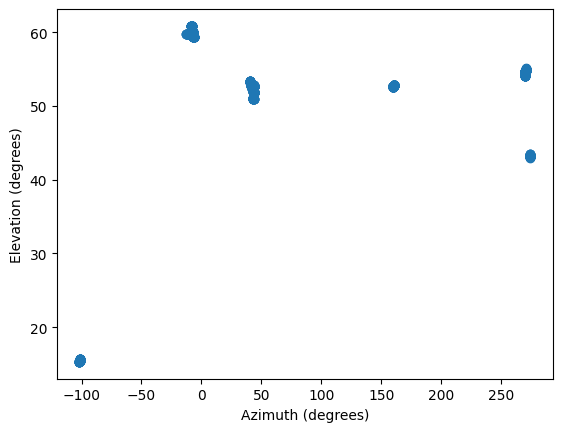

In [11]:
import katdal

# ---- KATDAL TEST ----
print(observations_rfi.iloc[0]["url"])
d = katdal.open(observations_rfi.iloc[0]["url"])
d.select(scans='track', channels=slice(200, 300), ants='m000')
print(d)

plt.plot(d.az, d.el, 'o')
plt.xlabel('Azimuth (degrees)')
plt.ylabel('Elevation (degrees)')
plt.show()